In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import multiprocessing
from concurrent.futures import ThreadPoolExecutor

warnings.filterwarnings("ignore")

In [3]:
# Number of Cores: 16 for Predator Helios 300 (i7 10th gen)
numberOfCores = multiprocessing.cpu_count()
print("Num of cores are: ", numberOfCores)

Num of cores are:  16


In [4]:
# Function for multiplying two matrices
def matrix_multiply(mat1, mat2):
    return np.dot(mat1, mat2)

In [5]:
# Function to perform matrix multiplications
def perform_matrix_multiplications(num_matrices, matrix_size, constant_matrix):
    results = []
    for _ in range(num_matrices):
        random_matrix = np.random.rand(*matrix_size)
        result = matrix_multiply(random_matrix, constant_matrix)
        results.append(result)
    return results

In [6]:
def main(num_threads):
    matrix_size = (2000, 2000)
    num_matrices = 100
    constant_matrix = np.random.rand(*matrix_size)

    # Start time 
    start_time = time.time()

    # Perform matrix multiplications with specified number of threads
    with ThreadPoolExecutor(max_workers=num_threads) as executor:
        results = executor.map(
            perform_matrix_multiplications,
            [num_matrices // num_threads] * num_threads,
            [matrix_size] * num_threads,
            [constant_matrix] * num_threads
        )

    # End time measurement
    end_time = time.time()
    total_time = end_time - start_time

    # Flatten the results list
    results = [result for sublist in results for result in sublist]

    print(f"Time taken with {num_threads} threads: {total_time:.4f} seconds")
    return total_time


In [7]:
num_threads = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
tt = []
for i in range(0, len(num_threads)):
    tt.append(main(num_threads[i]))

Time taken with 1 threads: 21.7392 seconds
Time taken with 2 threads: 19.5289 seconds
Time taken with 3 threads: 20.0245 seconds
Time taken with 4 threads: 16.5004 seconds
Time taken with 5 threads: 13.2827 seconds
Time taken with 6 threads: 12.5169 seconds
Time taken with 7 threads: 13.4517 seconds
Time taken with 8 threads: 12.7461 seconds
Time taken with 9 threads: 12.5203 seconds
Time taken with 10 threads: 13.3718 seconds
Time taken with 11 threads: 14.0723 seconds
Time taken with 12 threads: 13.1298 seconds
Time taken with 13 threads: 12.6890 seconds
Time taken with 14 threads: 13.1368 seconds
Time taken with 15 threads: 12.3505 seconds
Time taken with 16 threads: 12.7971 seconds


In [14]:
# Result Table
results_pd = pd.DataFrame(data = {
    'Threads': list(np.arange(1,17)),
    'Time Taken' : tt
})
results_pd

,Threads,Time Taken
0,1,21.739154
1,2,19.528908
2,3,20.024504
3,4,16.500403
4,5,13.282717
5,6,12.516893
6,7,13.451714
7,8,12.746060
8,9,12.520297
9,10,13.371803


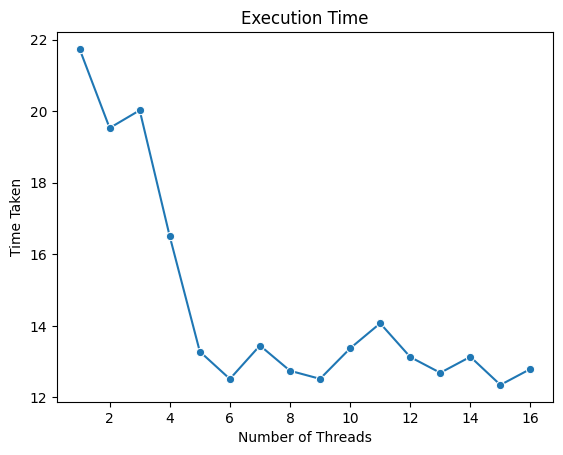

In [9]:
# Result Graph
sns.lineplot(x=num_threads, y=tt, marker='o')
plt.title('Execution Time')
plt.xlabel('Number of Threads')
plt.ylabel('Time Taken')
plt.show()